In [1]:
from tqdm import tqdm
import numpy as np
from src.structures import User, Movie
from src.data_methods import read_movies,read_viewers
import kagglehub
import os

In [15]:
# Download latest version
#please ikke offentliggør min api key. 
os.environ['KAGGLE_USERNAME'] = "marcusgaleajacobsen"
os.environ['KAGGLE_KEY'] = "32a3003f52c97053841ea46c492128dc"
datapath = kagglehub.dataset_download("netflix-inc/netflix-prize-data")

In [98]:
n_lines = 1000000#number of reviews to read
datafiles = ["combined_data_1.txt"]#, "combined_data_2.txt", "combined_data_3.txt", "combined_data_4.txt"]
with_tqdm = True #set to True to see progress bar (reduce speed)
reviews_pr_user = 10 #number of reviews per user to read

movies = read_movies(datapath)
users = read_viewers(datapath, movies, datafiles = datafiles, with_tqdm= with_tqdm, n_lines=n_lines) #read only 100000 

100%|██████████| 1000000/1000000 [00:05<00:00, 184710.74it/s]


In [99]:
#compute similarity matrix
n_movies = len(movies)
sim_matrix = np.zeros((n_movies, n_movies))
for i, movie_id1 in enumerate(tqdm(movies)):
    for j, movie_id2 in enumerate(movies):
        if j < i:
            sim_matrix[i, j] = movies[movie_id1].similarity(movies[movie_id2], method = "jaccard")
            sim_matrix[j, i] = sim_matrix[i, j]
        if j == i:
            sim_matrix[i, j] = np.nan

100%|██████████| 225/225 [00:39<00:00,  5.77it/s]


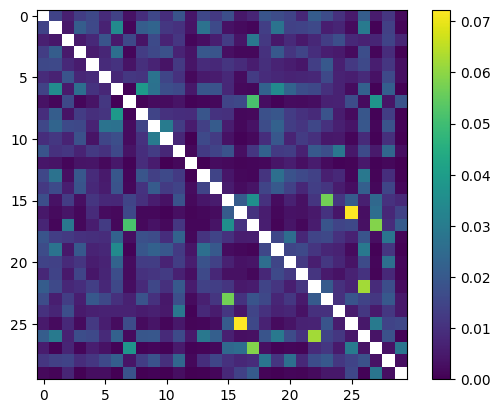

In [56]:
#heatmap of similarity matrix
import matplotlib.pyplot as plt
plt.imshow(sim_matrix)
plt.colorbar()
plt.show()

In [100]:
t = 0.04
b = 20
r= -np.log(b)/np.log(t) 
n_hashes = 40#int(np.ceil(r*b))

In [118]:
from src.similarity_methods import compute_signatures, create_buckets, get_candidates, trim_candidates, cartesian_product_exclude_greater
n_buckets = len(movies)**2

SIG = compute_signatures(movies, n_hashes, with_tqdm = True)

100%|██████████| 225/225 [00:18<00:00, 12.44it/s]


In [102]:
n_buckets = 2**16
buckets = create_buckets(SIG, bands = b, n_buckets= n_buckets)

In [103]:
candidates = get_candidates(buckets)


100%|██████████| 222/222 [00:00<?, ?it/s]

100%|██████████| 223/223 [00:00<00:00, 222697.57it/s]

100%|██████████| 219/219 [00:00<?, ?it/s]

100%|██████████| 219/219 [00:00<00:00, 219172.65it/s]

100%|██████████| 220/220 [00:00<?, ?it/s]

100%|██████████| 220/220 [00:00<?, ?it/s]

100%|██████████| 225/225 [00:00<?, ?it/s]

100%|██████████| 223/223 [00:00<?, ?it/s]

100%|██████████| 221/221 [00:00<?, ?it/s]

100%|██████████| 224/224 [00:00<?, ?it/s]

100%|██████████| 220/220 [00:00<?, ?it/s]

100%|██████████| 210/210 [00:00<?, ?it/s]

100%|██████████| 220/220 [00:00<?, ?it/s]

100%|██████████| 220/220 [00:00<00:00, 220120.92it/s]

100%|██████████| 208/208 [00:00<?, ?it/s]

100%|██████████| 220/220 [00:00<00:00, 219963.50it/s]

100%|██████████| 222/222 [00:00<?, ?it/s]

100%|██████████| 219/219 [00:00<?, ?it/s]

100%|██████████| 221/221 [00:00<?, ?it/s]

100%|██████████| 20/20 [00:00<00:00, 221.36it/s]


In [104]:
candidates

{('100', '101'),
 ('100', '214'),
 ('101', '202'),
 ('101', '214'),
 ('104', '165'),
 ('104', '171'),
 ('104', '24'),
 ('108', '167'),
 ('108', '197'),
 ('108', '216'),
 ('108', '30'),
 ('110', '208'),
 ('110', '73'),
 ('110', '90'),
 ('111', '148'),
 ('114', '135'),
 ('114', '85'),
 ('115', '25'),
 ('118', '33'),
 ('118', '78'),
 ('124', '222'),
 ('126', '210'),
 ('127', '155'),
 ('127', '47'),
 ('128', '60'),
 ('129', '132'),
 ('138', '209'),
 ('143', '156'),
 ('143', '166'),
 ('143', '167'),
 ('143', '175'),
 ('143', '187'),
 ('143', '197'),
 ('143', '215'),
 ('143', '223'),
 ('143', '30'),
 ('143', '58'),
 ('143', '83'),
 ('147', '224'),
 ('148', '223'),
 ('148', '44'),
 ('148', '58'),
 ('148', '97'),
 ('15', '95'),
 ('150', '41'),
 ('152', '84'),
 ('156', '165'),
 ('156', '166'),
 ('156', '167'),
 ('156', '187'),
 ('156', '215'),
 ('156', '223'),
 ('156', '58'),
 ('156', '83'),
 ('157', '2'),
 ('159', '72'),
 ('16', '216'),
 ('161', '79'),
 ('165', '18'),
 ('165', '208'),
 ('165',

In [105]:
#binomial coefficient
from math import comb
n_candidates = len(candidates)
n_movies = len(movies)
n_pairs = comb(n_movies, 2)
n_pairs

25200

In [106]:
n_removed = trim_candidates(movies, candidates, threshold = t)
print(f"Removed {n_removed} from {len(candidates)} candidates")

100%|██████████| 130/130 [00:01<00:00, 109.32it/s]

Removed 52 from 130 candidates


In [ ]:
#get get pairs that have similarity above threshold
pairs = sim_matrix > t
#get indices of pairs
movie_id1, movie_id2 = np.where(pairs)
idx_map = {idx: movie_id for idx, movie_id in enumerate(movies)}
pairs = list(zip(movie_id1, movie_id2))
#map indices to movie ids
pairs = [(idx_map[i], idx_map[j]) for i, j in pairs]

In [ ]:
lenpairs

1672

In [124]:
candidates

{('100', '101'),
 ('100', '214'),
 ('101', '202'),
 ('101', '214'),
 ('104', '165'),
 ('104', '171'),
 ('104', '24'),
 ('108', '167'),
 ('108', '197'),
 ('108', '216'),
 ('108', '30'),
 ('110', '208'),
 ('110', '73'),
 ('110', '90'),
 ('111', '148'),
 ('114', '135'),
 ('114', '85'),
 ('115', '25'),
 ('118', '33'),
 ('118', '78'),
 ('124', '222'),
 ('126', '210'),
 ('127', '155'),
 ('127', '47'),
 ('128', '60'),
 ('129', '132'),
 ('138', '209'),
 ('143', '156'),
 ('143', '166'),
 ('143', '167'),
 ('143', '175'),
 ('143', '187'),
 ('143', '197'),
 ('143', '215'),
 ('143', '223'),
 ('143', '30'),
 ('143', '58'),
 ('143', '83'),
 ('147', '224'),
 ('148', '223'),
 ('148', '44'),
 ('148', '58'),
 ('148', '97'),
 ('15', '95'),
 ('150', '41'),
 ('152', '84'),
 ('156', '165'),
 ('156', '166'),
 ('156', '167'),
 ('156', '187'),
 ('156', '215'),
 ('156', '223'),
 ('156', '58'),
 ('156', '83'),
 ('157', '2'),
 ('159', '72'),
 ('16', '216'),
 ('161', '79'),
 ('165', '18'),
 ('165', '208'),
 ('165',

{0: '1',
 1: '2',
 2: '3',
 3: '4',
 4: '5',
 5: '6',
 6: '7',
 7: '8',
 8: '9',
 9: '10',
 10: '11',
 11: '12',
 12: '13',
 13: '14',
 14: '15',
 15: '16',
 16: '17',
 17: '18',
 18: '19',
 19: '20',
 20: '21',
 21: '22',
 22: '23',
 23: '24',
 24: '25',
 25: '26',
 26: '27',
 27: '28',
 28: '29',
 29: '30',
 30: '31',
 31: '32',
 32: '33',
 33: '34',
 34: '35',
 35: '36',
 36: '37',
 37: '38',
 38: '39',
 39: '40',
 40: '41',
 41: '42',
 42: '43',
 43: '44',
 44: '45',
 45: '46',
 46: '47',
 47: '48',
 48: '49',
 49: '50',
 50: '51',
 51: '52',
 52: '53',
 53: '54',
 54: '55',
 55: '56',
 56: '57',
 57: '58',
 58: '59',
 59: '60',
 60: '61',
 61: '62',
 62: '63',
 63: '64',
 64: '65',
 65: '66',
 66: '67',
 67: '68',
 68: '69',
 69: '70',
 70: '71',
 71: '72',
 72: '73',
 73: '74',
 74: '75',
 75: '76',
 76: '77',
 77: '78',
 78: '79',
 79: '80',
 80: '81',
 81: '82',
 82: '83',
 83: '84',
 84: '85',
 85: '86',
 86: '87',
 87: '88',
 88: '89',
 89: '90',
 90: '91',
 91: '92',
 92: '9